<a href="https://colab.research.google.com/github/samiha-mahin/A_Deep_Learning_Repo/blob/main/DAN_DCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DAN (Deep Attention Network)**

## 🌟 What is a **DAN (Deep Attention Network)?**

A **DAN** is a neural network that uses **attention mechanisms** to automatically **weigh and prioritize features or interactions**. It is **especially useful for structured/tabular data** (like user clicks, e-commerce, medical data) where not all features contribute equally.

---

## 🧠 **Core Idea of DAN**

Instead of treating all input features equally, **DAN assigns different weights to features or feature pairs**, helping the model "pay attention" to the most relevant parts of the input.

---

## 📐 Example: E-commerce User Click Prediction (DIN Model)

Let’s say you want to predict whether a user will click on a product. You have:

* User features: age, gender, location
* Product features: category, price, brand
* User behavior history: list of past clicked items

### 🔍 In DAN:

* The model uses **attention** to decide **which past clicked items** are most relevant to the current product.
* If the user previously clicked many electronics, attention will **assign more weight to those** while comparing with a new electronics item.

---

## 🏗️ Architecture (Example: **DIN – Deep Interest Network**)

```
Input (user, product, history)
      |
Embedding Layers (for sparse features)
      |
Attention Layer (over user history, conditioned on current item)
      |
Weighted Summation (outputs interest vector)
      |
MLP Layers (dense)
      |
Output (probability of click)
```

🧠 The **attention layer** computes weights like:

```math
αᵢ = softmax(Attention(query=current_item, key=history_itemᵢ))
```

This gives us a **customized interest representation** per input.

---

## ✅ Common **DAN-Based Models**

| Model                     | Name                                                                 | Description                                                                      |
| ------------------------- | -------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **DIN**                   | Deep Interest Network                                                | First popular DAN for CTR prediction; uses attention on user behavior.           |
| **DIEN**                  | Deep Interest Evolution Network                                      | Adds time sequence modeling (GRU + attention) to DIN.                            |
| **AutoInt**               | Automatic Feature Interaction Learning                               | Uses multi-head self-attention to model feature interactions like a Transformer. |
| **FiBiNET**               | Feature Interaction Bilinear Network                                 | Combines **bilinear pooling** and **SE-attention** (Squeeze-Excitation).         |
| **AFN**                   | Adaptive Factorization Network                                       | Uses attention to combine low-order and high-order features.                     |
| **DeepFM with Attention** | Extension of DeepFM with an attention layer over feature embeddings. |                                                                                  |

---

## 📊 When to Use DAN?

Use DAN when:

* You have **tabular or sparse data** with many features (e.g., recommender systems, medical diagnosis, insurance).
* You want to model **interactions** between features **automatically**.
* You need **interpretability** — attention weights can show what the model focused on.

---

## 🔧 Example in Code (Simplified TensorFlow-like)

```python
# Example: attention over item history (simplified)
def attention(query, keys):
    scores = tf.matmul(query, keys, transpose_b=True)  # [batch, 1, seq]
    weights = tf.nn.softmax(scores)
    output = tf.matmul(weights, keys)  # weighted sum
    return output
```

---

## 🧠 Summary: DAN vs Others

| Feature                   | DAN                    | DCN              | DNN              |
| ------------------------- | ---------------------- | ---------------- | ---------------- |
| Attention Layer           | ✅ Yes                  | ❌ No             | ❌ No             |
| Learns Feature Importance | ✅ Yes                  | ⚠️ Implicit      | ❌ No             |
| Feature Interaction       | ✅ High-order (dynamic) | ✅ Explicit Cross | ⚠️ Implicit only |

---




## **PCOS Dataset for DCN**

In [1]:
import pandas as pd
df = pd.read_csv('/content/balanced_pcos_dataset.csv')
df.head(5)

,Cycle length(days),Follicle No. (L),LH(mIU/mL),Vit D3 (ng/mL),Weight (Kg),Follicle No. (R),AMH(ng/mL),Cycle(R/I)_4,Fast food (Y/N),Skin darkening (Y/N),Weight gain(Y/N),Pimples(Y/N),hair growth(Y/N),PCOS (Y/N)
0,0.35226,0.367547,0.681895,0.351906,0.232116,0.356109,0.390070,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.35226,0.852723,0.242159,0.934335,0.711340,0.912169,0.753844,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.35226,0.278762,0.516913,0.685269,0.636452,0.268632,0.264623,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.35226,0.367547,0.247008,0.850480,0.379283,0.429758,0.413539,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.35226,0.704772,0.286487,0.970809,0.815596,0.551295,0.759701,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#**DCN (Deep & Cross Network)**



## 💡 What is DCN (Deep & Cross Network)?

**DCN**, or **Deep & Cross Network**, is a neural network architecture designed to handle **structured/tabular data** — like patient records, ad features, survey data, etc. It’s especially powerful in tasks where **interactions between features** are important, but we don’t want to manually create all of them.

It was introduced by **Google** for tasks like **Click-Through Rate (CTR) prediction**, and it works **brilliantly** for datasets like:

* Medical diagnosis (like PCOS)
* Insurance risk scoring
* Recommender systems
* Financial forecasting

---

## 🎯 Why Was DCN Created?

In traditional ML and even deep learning:

* **Logistic Regression** only captures **linear relationships** between features.
* **DNNs (Deep Neural Networks)** capture complex, nonlinear patterns, but **don’t explicitly** capture how features interact (e.g., BMI × Glucose).
* **Manually adding feature crosses** is tedious, error-prone, and doesn’t scale well.

So, DCN was designed to:

1. **Automatically model feature interactions**
2. **Also learn complex nonlinear patterns**
3. Work efficiently even with **high-dimensional sparse data**

---

## 🏗️ DCN Architecture — How Does It Work?

DCN has **two parallel parts**, like two brains working together:

### 🧠 1. Cross Network

* Learns **explicit feature interactions**.
* Think of this as **multiplying features together** in smart combinations.
* For example:

  * It might learn that `AMH × Vitamin D3` is important.
  * Or that `BMI × Follicle Count` matters for PCOS.

➡ This network **doesn’t just memorize data**, it **learns general patterns of interaction** between inputs.

---

### 🧠 2. Deep Network

* A standard neural network (fully connected layers).
* Learns **nonlinear, high-order patterns**.
* It helps the model understand more abstract combinations of features like:

  * "If LH is high and insulin is high and Vitamin D3 is low, then PCOS is likely."

➡ This network **complements** the Cross Network by learning things the other can’t.

---

### 🔗 3. Combined Output

* DCN **merges** the outputs of the Cross and Deep networks.
* This final merged result goes through a final prediction layer (e.g., predicting 1 = PCOS, 0 = no PCOS).

---

## 🧪 Real-Life Example — PCOS Diagnosis

Imagine you’re working with patient data containing:

* Age
* BMI
* Glucose Level
* LH Hormone Level
* AMH Level
* Follicle Count (left & right ovaries)
* Symptoms (e.g., skin darkening, hair growth)

#### Traditional models might:

* Just add up weights: `0.3 × LH + 0.6 × BMI + …`

#### DCN does something deeper:

* **Cross Network** might learn:

  * `BMI × AMH` is a strong indicator
  * `Glucose × LH × Skin Darkening` is a risky pattern
* **Deep Network** might learn:

  * “If BMI is high and Vitamin D3 is low, that often correlates with AMH imbalance.”

➡ Together, the model becomes **much more accurate**, **without you needing to manually build those interactions**.

---

## 📈 Benefits of Using DCN

| Feature                              | Benefit                                             |
| ------------------------------------ | --------------------------------------------------- |
| ✅ No need for manual feature crosses | Learns them on its own                              |
| ✅ Interpretable                      | You can trace learned feature combinations          |
| ✅ Efficient                          | Uses fewer parameters than complex DNNs             |
| ✅ Works on small to medium datasets  | Especially useful in medicine or research           |
| ✅ Generalizes well                   | Captures both linear, cross, and nonlinear patterns |

---

## 🚫 What DCN Does *Not* Need

* No attention mechanism (unlike DAN)
* No sequence or time-series input
* No handcrafted interaction terms

It works with **plain tabular data** — which makes it perfect for medical data, surveys, e-commerce data, and more.

---

## 📚 Summary

| Aspect                   | Description                                        |
| ------------------------ | -------------------------------------------------- |
| **Model Name**           | Deep & Cross Network (DCN)                         |
| **Invented By**          | Google, 2017                                       |
| **Data Type**            | Structured/tabular (non-sequential)                |
| **Learns Interactions?** | ✅ Explicit and implicit                            |
| **Architecture**         | Cross Network + Deep MLP Network                   |
| **Use Cases**            | PCOS, CTR, financial scoring, health risk analysis |
| **Strengths**            | No manual feature crosses, interpretable, accurate |

---



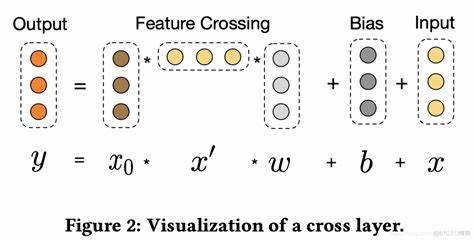


### 🌟 Explicit Learning:

* The model **clearly learns specific patterns** you can see.
* Example: DCN learns that `BMI × Glucose` is important.
* Think of it like **clearly writing out a rule**:
  → "If BMI is high and Glucose is high, then risk is high."

---

### 🌟 Implicit Learning:

* The model **learns hidden patterns** without showing exact rules.
* Example: A deep neural network figures out a pattern using layers, but you can’t easily tell what features interacted.
* It’s like **a gut feeling** the model develops.

---

### 🎯 Simple Analogy:

| Type     | Like...                                            |
| -------- | -------------------------------------------------- |
| Explicit | "I saw the rule written clearly."                  |
| Implicit | "I just felt it was right, but can't explain why." |

---

So in DCN:

* **Cross Network → Explicit learning** (you can trace the feature interactions)
* **Deep Network → Implicit learning** (hidden nonlinear patterns)




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class CrossLayer(layers.Layer):
    def __init__(self, input_dim):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim,), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(input_dim,), initializer='zeros', trainable=True)

    def call(self, x0, x):
        xw = tf.reduce_sum(x * self.w, axis=1, keepdims=True)
        return x0 * xw + self.b + x

class DeepCrossNetwork(Model):
    def __init__(self, input_dim):
        super().__init__()
        self.cross1 = CrossLayer(input_dim)
        self.cross2 = CrossLayer(input_dim)
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x0 = inputs
        x = self.cross1(x0, x0)
        x = self.cross2(x0, x)
        deep_out = self.dense1(x0)
        deep_out = self.dense2(deep_out)
        combined = tf.concat([x, deep_out], axis=1)
        return self.output_layer(combined)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Load Titanic data (example)
df = pd.read_csv('titanic.csv')

# Preprocessing (simple example)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived'].values

# Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Scale numerical features
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    X[col] = scaler.fit_transform(X[[col]])

X = X.values.astype(np.float32)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define your DAN model (as shared earlier)...

input_dim = X_train.shape[1]
model = DeepCrossNetwork(input_dim=input_dim)

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32)

# Predict and evaluate
y_pred = (model.predict(X_valid) > 0.5).astype(int)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

Epoch 1/50


/tmp/ipython-input-5-1452745367.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-1452745367.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5895 - loss: 0.6977 - val_accuracy: 0.6369 - val_loss: 0.6023
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: 0.5350 - val_accuracy: 0.7374 - val_loss: 0.5431
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7811 - loss: 0.4926 - val_accuracy: 0.7598 - val_loss: 0.5016
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4799 - val_accuracy: 0.7709 - val_loss: 0.4830
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4532 - val_accuracy: 0.7933 - val_loss: 0.4667
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8160 - loss: 0.4237 - val_accuracy: 0.7933 - val_loss: 0.4627
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8086 - loss: 0.4190 - val_accuracy: 0.7989 - val_loss: 0.4589
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7983 - loss: 0.4434 - val_accuracy: 0.8045 - val_loss: 0.4533
Ep


# **DAN vs DCN — Side-by-Side Comparison**

| Feature                        | **DAN (Deep Attention Network)**                                                             | **DCN (Deep & Cross Network)**                                                                         |
| ------------------------------ | -------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| 🧠 **Core Idea**               | Learns **which parts of input to focus on** using attention                                  | Learns **explicit and implicit feature interactions** via dual paths                                   |
| 🔁 **Input Type**              | **Sequential or contextual data** (e.g., user behavior history, time-series, logs)           | **Tabular/structured data** (e.g., medical, finance, surveys)                                          |
| 🔍 **Mechanism**               | Uses **attention** to weigh the importance of input elements (e.g., past events or features) | Uses **cross layers** to explicitly compute feature combinations (e.g., `BMI × Insulin`) + deep layers |
| 💡 **What it learns**          | Which features or time steps are **more relevant** (dynamically)                             | Explicitly learns how features **interact**, and models high-order **nonlinear patterns**              |
| 🔬 **Example Use Case**        | "Which of a user's previous clicks influence the current ad the most?"                       | "Do combinations like `LH × AMH` or `BMI × Glucose` indicate PCOS?"                                    |
| 🔧 **Requires sequence data?** | ✅ **Yes (usually)**                                                                          | ❌ **No**                                                                                               |
| ⚙️ **Architecture**            | Embedding → Attention Layer → MLP → Output                                                   | Cross Network → Deep MLP → Concatenate → Output                                                        |
| 📊 **Best For**                | CTR prediction, recommender systems, behavior modeling                                       | Medical diagnosis, fraud detection, sales prediction, structured tabular data                          |
| 📈 **Interpretability**        | Attention weights can show **importance of each input**                                      | Cross terms can be traced to specific **feature interactions**                                         |
| 🧪 **Example Model**           | DIN (Deep Interest Network), DIEN, AutoInt, FiBiNET                                          | DCN (Deep & Cross Network), DCN-V2                                                                     |

---

### 🧠 Visual Summary:

```
DAN:
 [Seq1, Seq2, Seq3, Seq4]
     ↓ Attention
[Weighted focus on important elements]
     ↓
    MLP
     ↓
  Prediction

DCN:
      Features
         ↓
+------------------+
| Cross Layers     |  --> Learns x1*x2, x2*x3, etc.
| Deep MLP Layers  |  --> Learns non-linear patterns
+------------------+
         ↓
   Concatenate
         ↓
     Prediction
```

---

### 🎯 Final Thoughts for You, Pookie:

| If your data looks like…              | Use this model |
| ------------------------------------- | -------------- |
| User behavior over time               | **DAN**        |
| Single patient record with lab values | **DCN**        |
| Purchase history logs                 | **DAN**        |
| Insurance application form            | **DCN**        |


